In [1]:
import numpy as np
import pandas as pd
import os
from scipy import misc
import matplotlib.pyplot as plt

%matplotlib inline

system = 'windows'

if system == 'mac':
    pin_info_data = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/sam_new/aerial_cropped/prediction_stats/tr_cv_ts_pins_info.csv'
    aerial_cropped_cv_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/sam_new/aerial_cropped/prediction_stats/cvalid_pred_outcomes.csv'
    aerial_cropped_ts_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/sam_new/aerial_cropped/prediction_stats/test_pred_outcomes.csv'
    aerial_cropped_image_path = '/Users/sam/All-Program/App-DataSet/HouseClassification/input_images/sam_new/aerial_cropped'
else:
    pin_info_data = r'C:\Users\newline\Documents\ImageClassification\data\statistics\sam_new\aerial_cropped\prediction_stats\tr_cv_ts_pins_info.csv'
    aerial_cropped_cv_stats = r'C:\Users\newline\Documents\ImageClassification\data\statistics\sam_new\aerial_cropped\prediction_stats\cvalid_pred_outcomes.csv'
    aerial_cropped_ts_stats = r'C:\Users\newline\Documents\ImageClassification\data\statistics\sam_new\aerial_cropped\prediction_stats\test_pred_outcomes.csv'
    aerial_cropped_image_path = r'C:\Users\newline\Documents\ImageClassification\data\input_images\sam_new\aerial_cropped'


In [ ]:
def vizualize(get_img_obj, image_path_array, title_arr, data_type, rows, columns, figsize=(40, 6)):
    fig1, axs = plt.subplots(rows ,columns, figsize=figsize, facecolor='y', edgecolor='k')
    if columns> 1:
        axs = axs.ravel()
    for no, (image_path, title) in enumerate(zip(image_path_array, title_arr)):
        image, _ = get_img_obj.process_images_given_path(image_path)
        axs[no].imshow(np.array(image, dtype=data_type))
        axs[no].set_title(title, fontsize=25)


obj_gI = DumpBatches(dict(img_in_shape=[400, 400, 3],
                          img_out_shape=[224, 224, 3],
                          img_crop_shape=[128, 128, 3],
                          img_resize_shape=[128, 128, 3],
                          enable_rotation=True))

In [2]:
import imutils
from scipy import misc

def central_crop(image, height, width):
    if image.shape[0] > height and image.shape[1] > width:
        ysize, xsize, chan = image.shape
        xoff = (xsize - height) // 2
        yoff = (ysize - width) // 2
        img = image[yoff:-yoff, xoff:-xoff]
        # print (img.shape)
    else:
        img = image
    return img


def zero_pad(inp, crop_shape, out_shape):

    m, n, c = crop_shape  
    out_m, out_n, out_c = out_shape
    
    to_pad_m = max(out_m - m, 0)
    to_pad_n = max(out_n - n, 0)
    to_pad_c = max(out_c - c, 0)
    
    pad_m1 = to_pad_m // 2
    pad_m2 = to_pad_m - pad_m1
    
    pad_n1 = to_pad_n // 2
    pad_n2 = to_pad_n - pad_n1
    
    pad_c1 = to_pad_c // 2
    pad_c2 = to_pad_c - pad_c1
    
    inp = np.pad(inp, ((pad_m1, pad_m2), (pad_n1, pad_n2), (pad_c1, pad_c2)), 'constant')
    return inp


class GetImages():
    def __init__(self, img_in_shape, img_out_shape, img_crop_shape, img_resize_shape,
                 enable_rotation=True):
        # print(img_in_shape, img_out_shape, img_crop_shape, img_resize_shape)
       
        self.img_in_shape = img_in_shape
        self.img_out_shape = img_out_shape
        
        
        if img_crop_shape is not None:
            self.img_crop_shape = img_crop_shape
        else:
            self.img_crop_shape = []
        
        if img_resize_shape is not None:
            self.img_resize_shape = img_resize_shape
        else:
            self.img_resize_shape = []
        
        if enable_rotation:
            self.angle = 90
            self.enable_rotation = enable_rotation
        else:
            self.enable_rotation = False
        
    
    def process_images_given_path(self, pic_path):
        image = misc.imread(pic_path, mode='RGB')
        
        # if self.image_type == 'aerial_cropped':
        if image.shape[0] == self.img_in_shape[0] and image.shape[1] == self.img_in_shape[1]:
            # The above condition takes care of the different sizes. If a bounding box was already cropped
            # then we don't crop further. But if no bounding box was found then we perform a central crop.
            if len(self.img_crop_shape) > 0:
                image = central_crop(image, height=self.img_crop_shape[0], width=self.img_crop_shape[1])
        
        # If the height is greater than width then we rotate the image by 90%
        if self.enable_rotation:
            if image.shape[0] > image.shape[1]:
                image = imutils.rotate_bound(image, self.angle)
        
        if len(self.img_resize_shape) > 0:
            image = misc.imresize(image, self.img_resize_shape)
        
        if image.shape[0] - self.img_out_shape[0] < 0:
            image = zero_pad(inp=image, crop_shape=self.img_crop_shape, out_shape=self.img_out_shape)
        elif len(self.img_out_shape) > 0:
            image = misc.imresize(image, self.img_out_shape)
        
        return image
    
    
def vizualize(get_img_obj, image_path_array, title_arr, data_type, rows, columns, figsize=(40, 6)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='y', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, (image_path, title) in enumerate(zip(image_path_array, title_arr)):
        image = get_img_obj.process_images_given_path(image_path)
        axs[no].imshow(np.array(image, dtype=data_type))
        axs[no].set_title(title,fontsize= 25)
        
obj_gI = GetImages(
    img_in_shape = [400, 400, 3],
    img_out_shape = [224, 224, 3],
    img_crop_shape = [128, 128, 3],
    img_resize_shape = [128, 128, 3],
    enable_rotation = True)

### Get the meta info

In [3]:
# pin_info = pd.read_csv(pin_info_data, index_col=None)
# pd.concat([pin_info.head(3), pin_info.tail(3)])

In [4]:
# aerial_cropped_cv = pd.read_csv(aerial_cropped_cv_stats)
# aerial_cropped_ts = pd.read_csv(aerial_cropped_ts_stats)
# print (aerial_cropped_cv.shape, aerial_cropped_ts.shape)
# pd.concat([aerial_cropped_cv.head(), aerial_cropped_ts.tail()])

In [29]:
def concat_meta_n_pred_stats(pred_stats, meta_stats, checkpoint_name_arr, which_data):
    column_names = ["true_label"]
    for num, checkpoint_name in enumerate(checkpoint_name_arr):
        column_names += ['%s_pred_label'%(checkpoint_name), '%s_pred_prob'%(checkpoint_name)] 
        if num == 0:
            pred_prob_data = np.array(
                pred_stats[pred_stats["checkpoint"] == checkpoint_name][["true_label","pred_label","pred_prob"]]
            ).reshape(-1,3)
        else:
            pred_prob_data = np.column_stack((
                pred_prob_data, np.array(pred_stats[pred_stats["checkpoint"] == checkpoint_name][["pred_label","pred_prob"]]).reshape(-1,2)
            ))

    pred_prob_data = pd.DataFrame(pred_prob_data, columns=column_names)
    meta_stats = meta_stats[meta_stats["dataset_type"]==which_data][["property_pins","property_type","bbox_cropped"]]
    print (pred_prob_data.shape, meta_stats.shape, meta_stats.reset_index().loc[0:1119,:].shape)
    concat_data = pd.concat([meta_stats.reset_index().drop('index', axis=1), pred_prob_data], axis=1)
    if concat_data.isnull().values.any():
        raise ValueError('NaN Found! Seems the concat operation did merge properly (Check dataframe shapes)')
    return concat_data

def dynamic_rule_based_mislabel_correction(min_pred_prob, checkpoint_arr, bbox_cropped=True):
    '''
        min_pred_prob: The minimum prediction values for each checkpoint to qualify as a mislabeled data. 
        checkpoint_arr: checkpoints to use while dynamically finding classification error due to mislabeled data.
        
    '''
    if len(min_pred_prob) != len(checkpoint_arr):
        raise ValueError('Provide min_pred_prob for each Checkpoint')
        
    dynamic_query = ''
    for num, (prob, checkpoint_name) in enumerate(zip(min_pred_prob, checkpoint_arr)):
        dynamic_query += ' %s_pred_prob >= %s & true_label-%s_pred_label!=0 &'%(checkpoint_name,prob,checkpoint_name)
    dynamic_query = dynamic_query.strip('&').strip(' ')

    if bbox_cropped:
        dynamic_query += " & ((property_type=='land' & bbox_cropped==1) | (property_type=='house' & bbox_cropped==0))"
    print(dynamic_query)
    
    return dynamic_query
    
    
def get_pin_path(dataIN, input_img_path):
    land_data = np.array(dataIN[dataIN['property_type']=='land']['property_pins'])
    house_data = np.array(dataIN[dataIN['property_type']=='house']['property_pins'])
    
    land_mis_pins_path = [os.path.join(input_img_path, 'land', pins+'.jpg') for pins in land_data]
    house_mis_pins_path = [os.path.join(input_img_path, 'house', pins+'.jpg') for pins in house_data]
    
    print(len(land_mis_pins_path), len(house_mis_pins_path))
    return land_mis_pins_path, house_mis_pins_path

def get_title_array(dataIN):
    land_data = dataIN[dataIN['property_type']=='land'].reset_index().drop('index', axis=1)
    house_data = dataIN[dataIN['property_type']=='house'].reset_index().drop('index', axis=1)

    land_data['rownum'] = pd.Series(range(0,len(land_data)))
    house_data['rownum'] = pd.Series(range(0,len(house_data)))
    

    land_data = np.array(land_data["rownum"].astype(str) + '--' +
                         land_data["property_pins"].astype(str))

    house_data = np.array(house_data["rownum"].astype(str) + '--' +
                          house_data["property_pins"].astype(str))
    
    print (len(land_data), len(house_data))
    return land_data, house_data

In [30]:
which_data = 'cvalid'
pred_stats = pd.read_csv(aerial_cropped_cv_stats)
meta_stats = pd.read_csv(pin_info_data, index_col=None)
checkpoint_name_arr = ['epoch_16_batch_70', 'epoch_17_batch_59']
concat_meta_pred_data = concat_meta_n_pred_stats(pred_stats=pred_stats, meta_stats=meta_stats, 
                                                  checkpoint_name_arr=checkpoint_name_arr, which_data='cvalid')
# concat_meta_pred_data.head()
dynamic_query = dynamic_rule_based_mislabel_correction(min_pred_prob=[1,1], checkpoint_arr=checkpoint_name_arr, bbox_cropped=True )

mislabeled_data = concat_meta_pred_data.query(dynamic_query)
mislabeled_data

(1120, 5) (1120, 3) (1120, 4)
epoch_16_batch_70_pred_prob >= 1 & true_label-epoch_16_batch_70_pred_label!=0 & epoch_17_batch_59_pred_prob >= 1 & true_label-epoch_17_batch_59_pred_label!=0 & ((property_type=='land' & bbox_cropped==1) | (property_type=='house' & bbox_cropped==0))


property_pins property_type  bbox_cropped  true_label  \
20    17-07-210-017-0000          land             1         0.0   
109   16-26-216-030-0000          land             1         0.0   
114   20-04-328-013-0000          land             1         0.0   
169   20-23-416-023-0000          land             1         0.0   
301   16-08-210-020-0000          land             1         0.0   
320   19-18-122-023-0000          land             1         0.0   
468   20-16-411-030-0000          land             1         0.0   
491   14-20-325-002-0000          land             1         0.0   
497   16-14-221-013-0000          land             1         0.0   
553   19-01-321-028-0000          land             1         0.0   
608   20-33-100-012-0000         house             0         1.0   
634   20-20-312-025-0000         house             0         1.0   
650   20-20-111-047-0000         house             0         1.0   
686   20-18-313-027-0000         house             0         1.0   
707   16-16-219-072-0000         house             0         1.0   
716   20-07-409-045-0000         house             0         1.0   
727   20-16-212-012-0000         house             0         1.0   
767   16-04-416-002-0000         house             0         1.0   
798   13-25-115-015-0000         house             0         1.0   
800   20-17-404-025-0000         house             0         1.0   
927   13-32-211-038-0000         house             0         1.0   
1000  16-02-310-031-0000         house             0         1.0   
1041  20-18-214-006-0000         house             0         1.0   
1048  17-04-300-047-1353         house             0         1.0   
1071  20-09-324-014-0000         house             0         1.0   

      epoch_16_batch_70_pred_label  epoch_16_batch_70_pred_prob  \
20                             1.0                          1.0   
109                            1.0                          1.0   
114                            1.0                          1.0   
169                            1.0                          1.0   
301                            1.0                          1.0   
320                            1.0                          1.0   
468                            1.0                          1.0   
491                            1.0                          1.0   
497                            1.0                          1.0   
553                            1.0                          1.0   
608                            0.0                          1.0   
634                            0.0                          1.0   
650                            0.0                          1.0   
686                            0.0                          1.0   
707                            0.0                          1.0   
716                            0.0                          1.0   
727                            0.0                          1.0   
767                            0.0                          1.0   
798                            0.0                          1.0   
800                            0.0                          1.0   
927                            0.0                          1.0   
1000                           0.0                          1.0   
1041                           0.0                          1.0   
1048                           0.0                          1.0   
1071                           0.0                          1.0   

      epoch_17_batch_59_pred_label  epoch_17_batch_59_pred_prob  
20                             1.0                          1.0  
109                            1.0                          1.0  
114                            1.0                          1.0  
169                            1.0                          1.0  
301                            1.0                          1.0  
320                            1.0                          1.0  
468                            1.0   

In [31]:
mis_land_pin_arr, mis_house_pin_arr = get_pin_path(dataIN=mislabeled_data, input_img_path=aerial_cropped_image_path)
mis_land_title_arr, mis_house_title_arr = get_title_array(dataIN=mislabeled_data)

10 15
10 15


In [32]:
# def get_mislabeled(checkpoint_name):
#     aerial_cropped_cv = pd.read_csv(aerial_cropped_cv_stats)
#     aerial_cropped_ts = pd.read_csv(aerial_cropped_ts_stats)
#     print ('Aerial Cropped data: ', aerial_cropped_cv.shape, aerial_cropped_ts.shape)
#     cv_ = aerial_cropped_cv[aerial_cropped_cv['checkpoint'] == checkpoint_name].reset_index()
#     ts_ = aerial_cropped_ts[aerial_cropped_ts['checkpoint'] == checkpoint_name].reset_index()
#     print ('Checkpoint :', cv_.shape, ts_.shape)

# #     test_pins = pin_info[pin_info['dataset_type'] == 'test'].reset_index().drop('index', 1)
# #     cvalid_pins = pin_info[pin_info['dataset_type'] == 'cvalid'].reset_index().drop('index', 1)
#     # Column stack the data to map pins to prediction
#     combined_cv_data = pd.concat([cvalid_pins[['property_pins', 'property_type']], cv_], axis=1)
#     combined_ts_data = pd.concat([test_pins[['property_pins', 'property_type']], ts_], axis=1)
#     print ('Column stacked data ', combined_cv_data.shape, combined_ts_data.shape)

#     cv_mislabeled = combined_cv_data[(combined_cv_data['true_label'] - combined_cv_data['pred_label'] != 0) &
#                                       (combined_cv_data['pred_prob'] == 1)]

#     ts_mislabeled = combined_ts_data[(combined_ts_data['true_label'] - combined_ts_data['pred_label'] != 0) &
#                                       (combined_ts_data['pred_prob'] == 1)]
#     return (cv_mislabeled[cv_mislabeled['property_type'] == 'land'], 
#             cv_mislabeled[cv_mislabeled['property_type'] == 'house'],
#             ts_mislabeled[ts_mislabeled['property_type'] == 'land'],
#             ts_mislabeled[ts_mislabeled['property_type'] == 'house'])


def get_pins(cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis):
    cv_land_mis_pins_path = [os.path.join(aerial_cropped_image_path, 'land', pins+'.jpg') for pins in np.array(cv_land_mis['property_pins'])]
    
    cv_house_mis_pins_path = [os.path.join(aerial_cropped_image_path, 'house', pins+'.jpg') for pins in np.array(cv_house_mis['property_pins'])]

    ts_land_mis_pins_path = [os.path.join(aerial_cropped_image_path, 'land', pins+'.jpg') for pins in np.array(ts_land_mis['property_pins'])]
    
    ts_house_mis_pins_path = [os.path.join(aerial_cropped_image_path, 'house', pins+'.jpg') for pins in np.array(ts_house_mis['property_pins'])]

    print(len(cv_land_mis_pins_path), len(cv_house_mis_pins_path), len(ts_land_mis_pins_path), len(ts_house_mis_pins_path))
    return cv_land_mis_pins_path, cv_house_mis_pins_path, ts_land_mis_pins_path, ts_house_mis_pins_path

def get_title_array(cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis):
    cv_land_mis = cv_land_mis.reset_index()
    cv_house_mis = cv_house_mis.reset_index()
    ts_land_mis = ts_land_mis.reset_index()
    ts_house_mis = ts_house_mis.reset_index()
    
    cv_land_mis['rownum'] = pd.Series(range(0,len(cv_land_mis)))
    cv_house_mis['rownum'] = pd.Series(range(0,len(cv_house_mis)))
    ts_land_mis['rownum'] = pd.Series(range(0,len(ts_land_mis)))
    ts_house_mis['rownum'] = pd.Series(range(0,len(ts_house_mis)))

    cv_land_mis_arr = np.array(cv_land_mis["rownum"].astype(str) + '--' +
                                  cv_land_mis["property_pins"].astype(str) + '--' + 
                                  cv_land_mis["pred_prob"].round(2).astype(str))

    cv_house_mis_arr = np.array(cv_house_mis["rownum"].astype(str) + '--' +
                                   cv_house_mis["property_pins"].astype(str) + '--' + 
                                   cv_house_mis["pred_prob"].round(2).astype(str))

    ts_land_mis_arr = np.array(ts_land_mis["rownum"].astype(str) + '--' +
                                  ts_land_mis["property_pins"].astype(str) + '--' + 
                                  ts_land_mis["pred_prob"].round(2).astype(str))

    ts_house_mis_arr = np.array(ts_house_mis["rownum"].astype(str) + '--' +
                                   ts_house_mis["property_pins"].astype(str) + '--' + 
                                   ts_house_mis["pred_prob"].round(2).astype(str))
    print (len(cv_land_mis_arr), len(cv_house_mis_arr), len(ts_land_mis_arr), len(ts_house_mis_arr))
    return cv_land_mis_arr, cv_house_mis_arr, ts_land_mis_arr, ts_house_mis_arr

# Analytical Answers for Questions:

### Actual Land: Predicted House, Prediction Probability = 1 

In [10]:
aerial_cropped_cv = pd.read_csv(aerial_cropped_cv_stats)
aerial_cropped_ts = pd.read_csv(aerial_cropped_ts_stats)
print (aerial_cropped_cv.shape, aerial_cropped_ts.shape)
pd.concat([aerial_cropped_cv.tail(), aerial_cropped_ts.tail()])

(10080, 5) (10080, 5)


checkpoint test_batch  true_label  pred_label  pred_prob
10075  epoch_17_batch_59     cvalid         1.0           1      0.972
10076  epoch_17_batch_59     cvalid         1.0           1      1.000
10077  epoch_17_batch_59     cvalid         1.0           1      1.000
10078  epoch_17_batch_59     cvalid         1.0           1      0.854
10079  epoch_17_batch_59     cvalid         1.0           1      1.000
10075  epoch_17_batch_59       test         1.0           0      0.925
10076  epoch_17_batch_59       test         1.0           1      1.000
10077  epoch_17_batch_59       test         1.0           1      1.000
10078  epoch_17_batch_59       test         1.0           0      1.000
10079  epoch_17_batch_59       test         1.0           0      0.835

In [11]:
checkpoint_name = 'epoch_17_batch_59'
cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis = get_mislabeled(checkpoint_name)
print (cv_land_mis.shape, cv_house_mis.shape, ts_land_mis.shape, ts_house_mis.shape)
pd.concat([cv_land_mis.head(2), cv_house_mis.head(2), ts_land_mis.head(2), ts_house_mis.head(2)])

Aerial Cropped data:  (10080, 5) (10080, 5)
Checkpoint : (1120, 6) (1120, 6)


NameError: name 'cvalid_pins' is not defined

In [64]:
cv_land_mis_pins_path, cv_house_mis_pins_path, ts_land_mis_pins_path, ts_house_mis_pins_path = get_pins(cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis)
cv_land_mis_pins_title, cv_house_mis_pins_title, ts_land_mis_pins_title, ts_house_mis_pins_title = get_title_array(cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis)

17 15 20 19
17 15 20 19


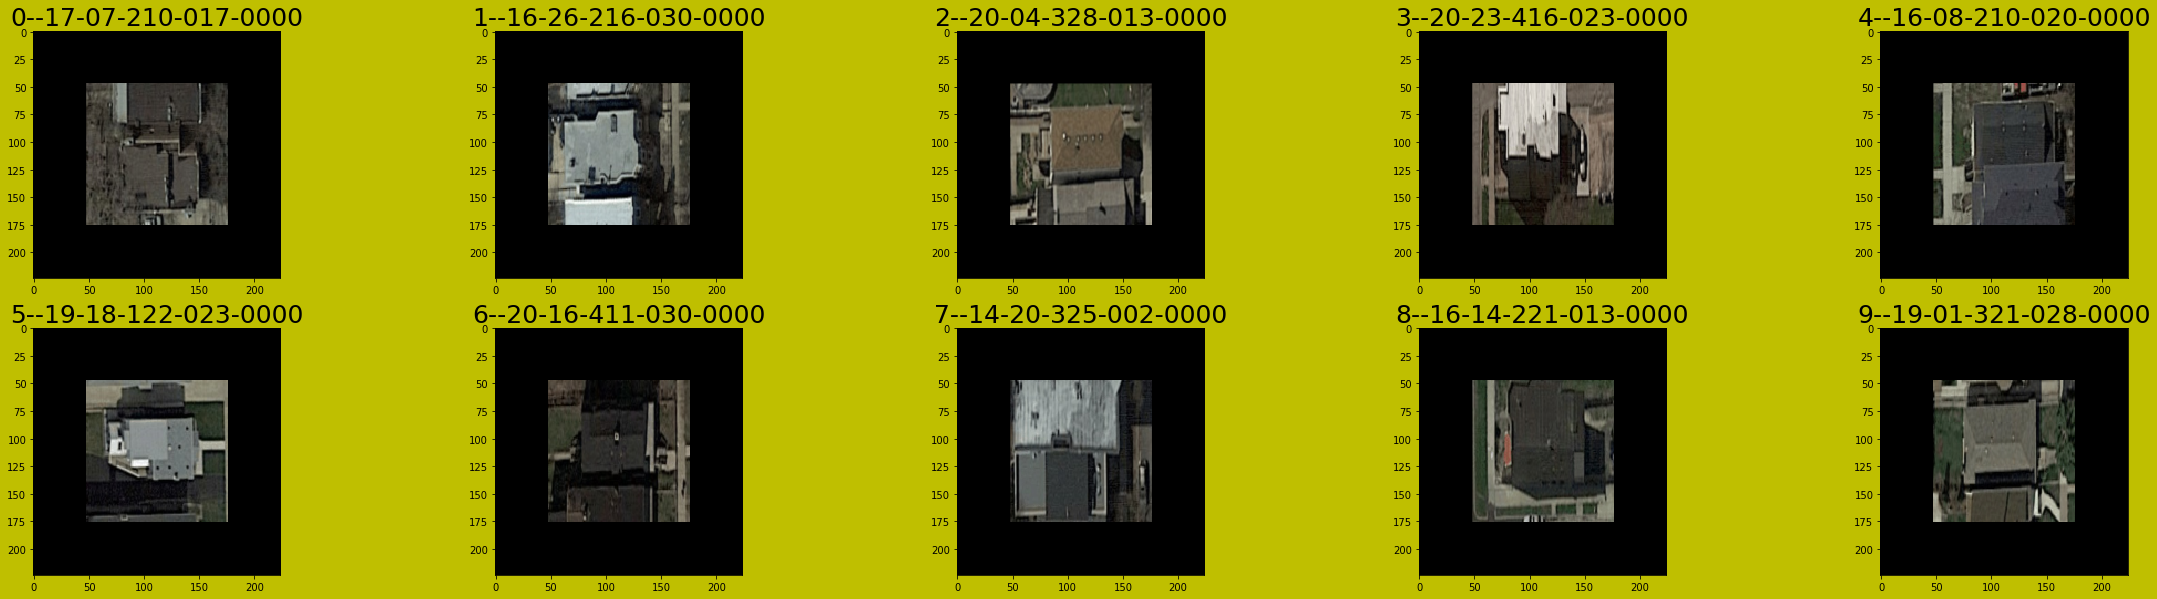

In [25]:
vizualize(obj_gI, mis_land_pin_arr, mis_land_title_arr, data_type='uint8', rows=2, columns=5, figsize=(40, 10))

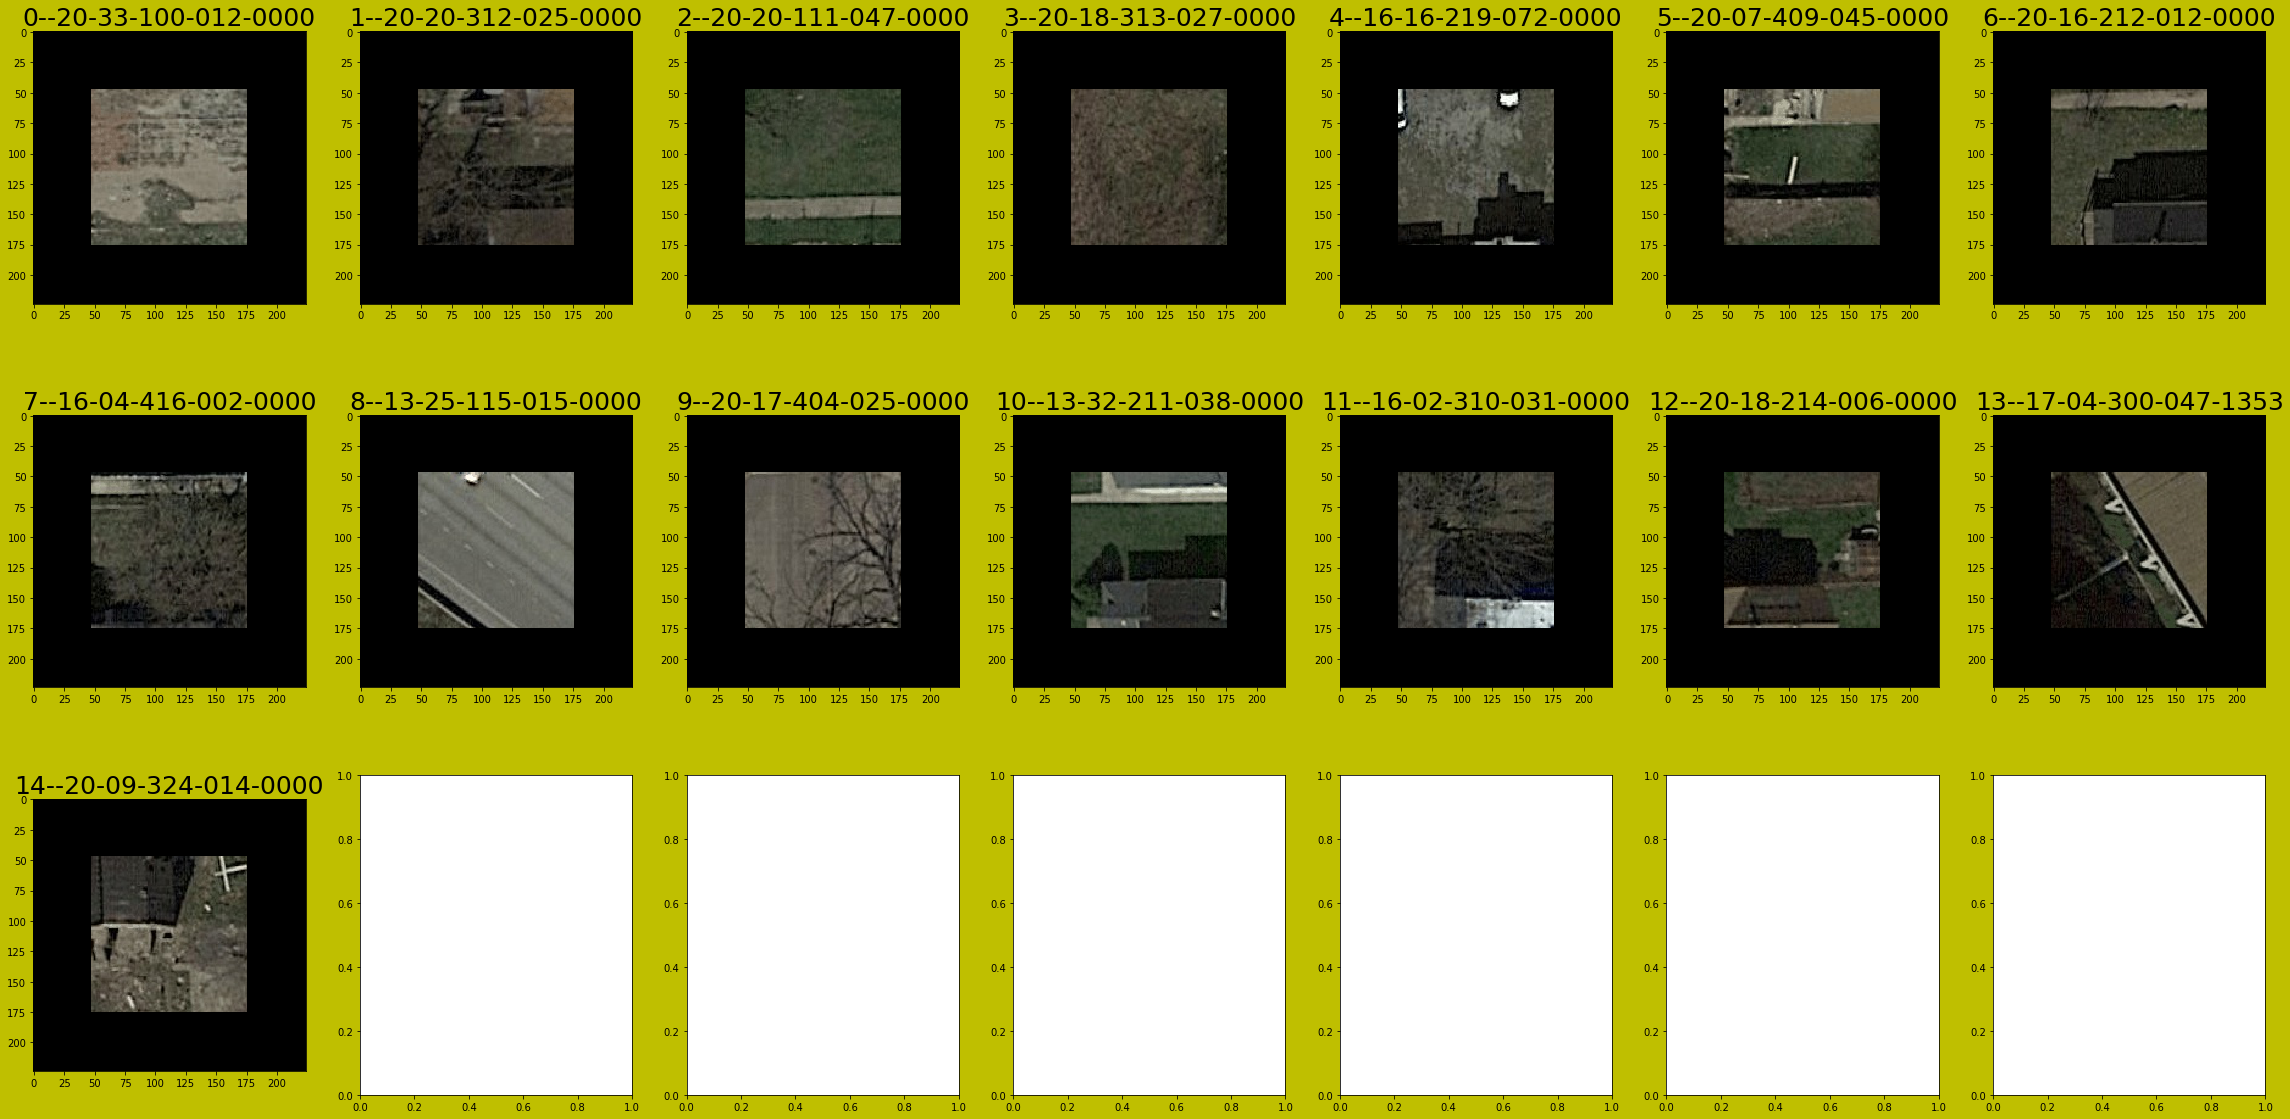

In [35]:
vizualize(obj_gI, mis_house_pin_arr, mis_house_title_arr, data_type='uint8', rows=3, columns=7, figsize=(40, 20))

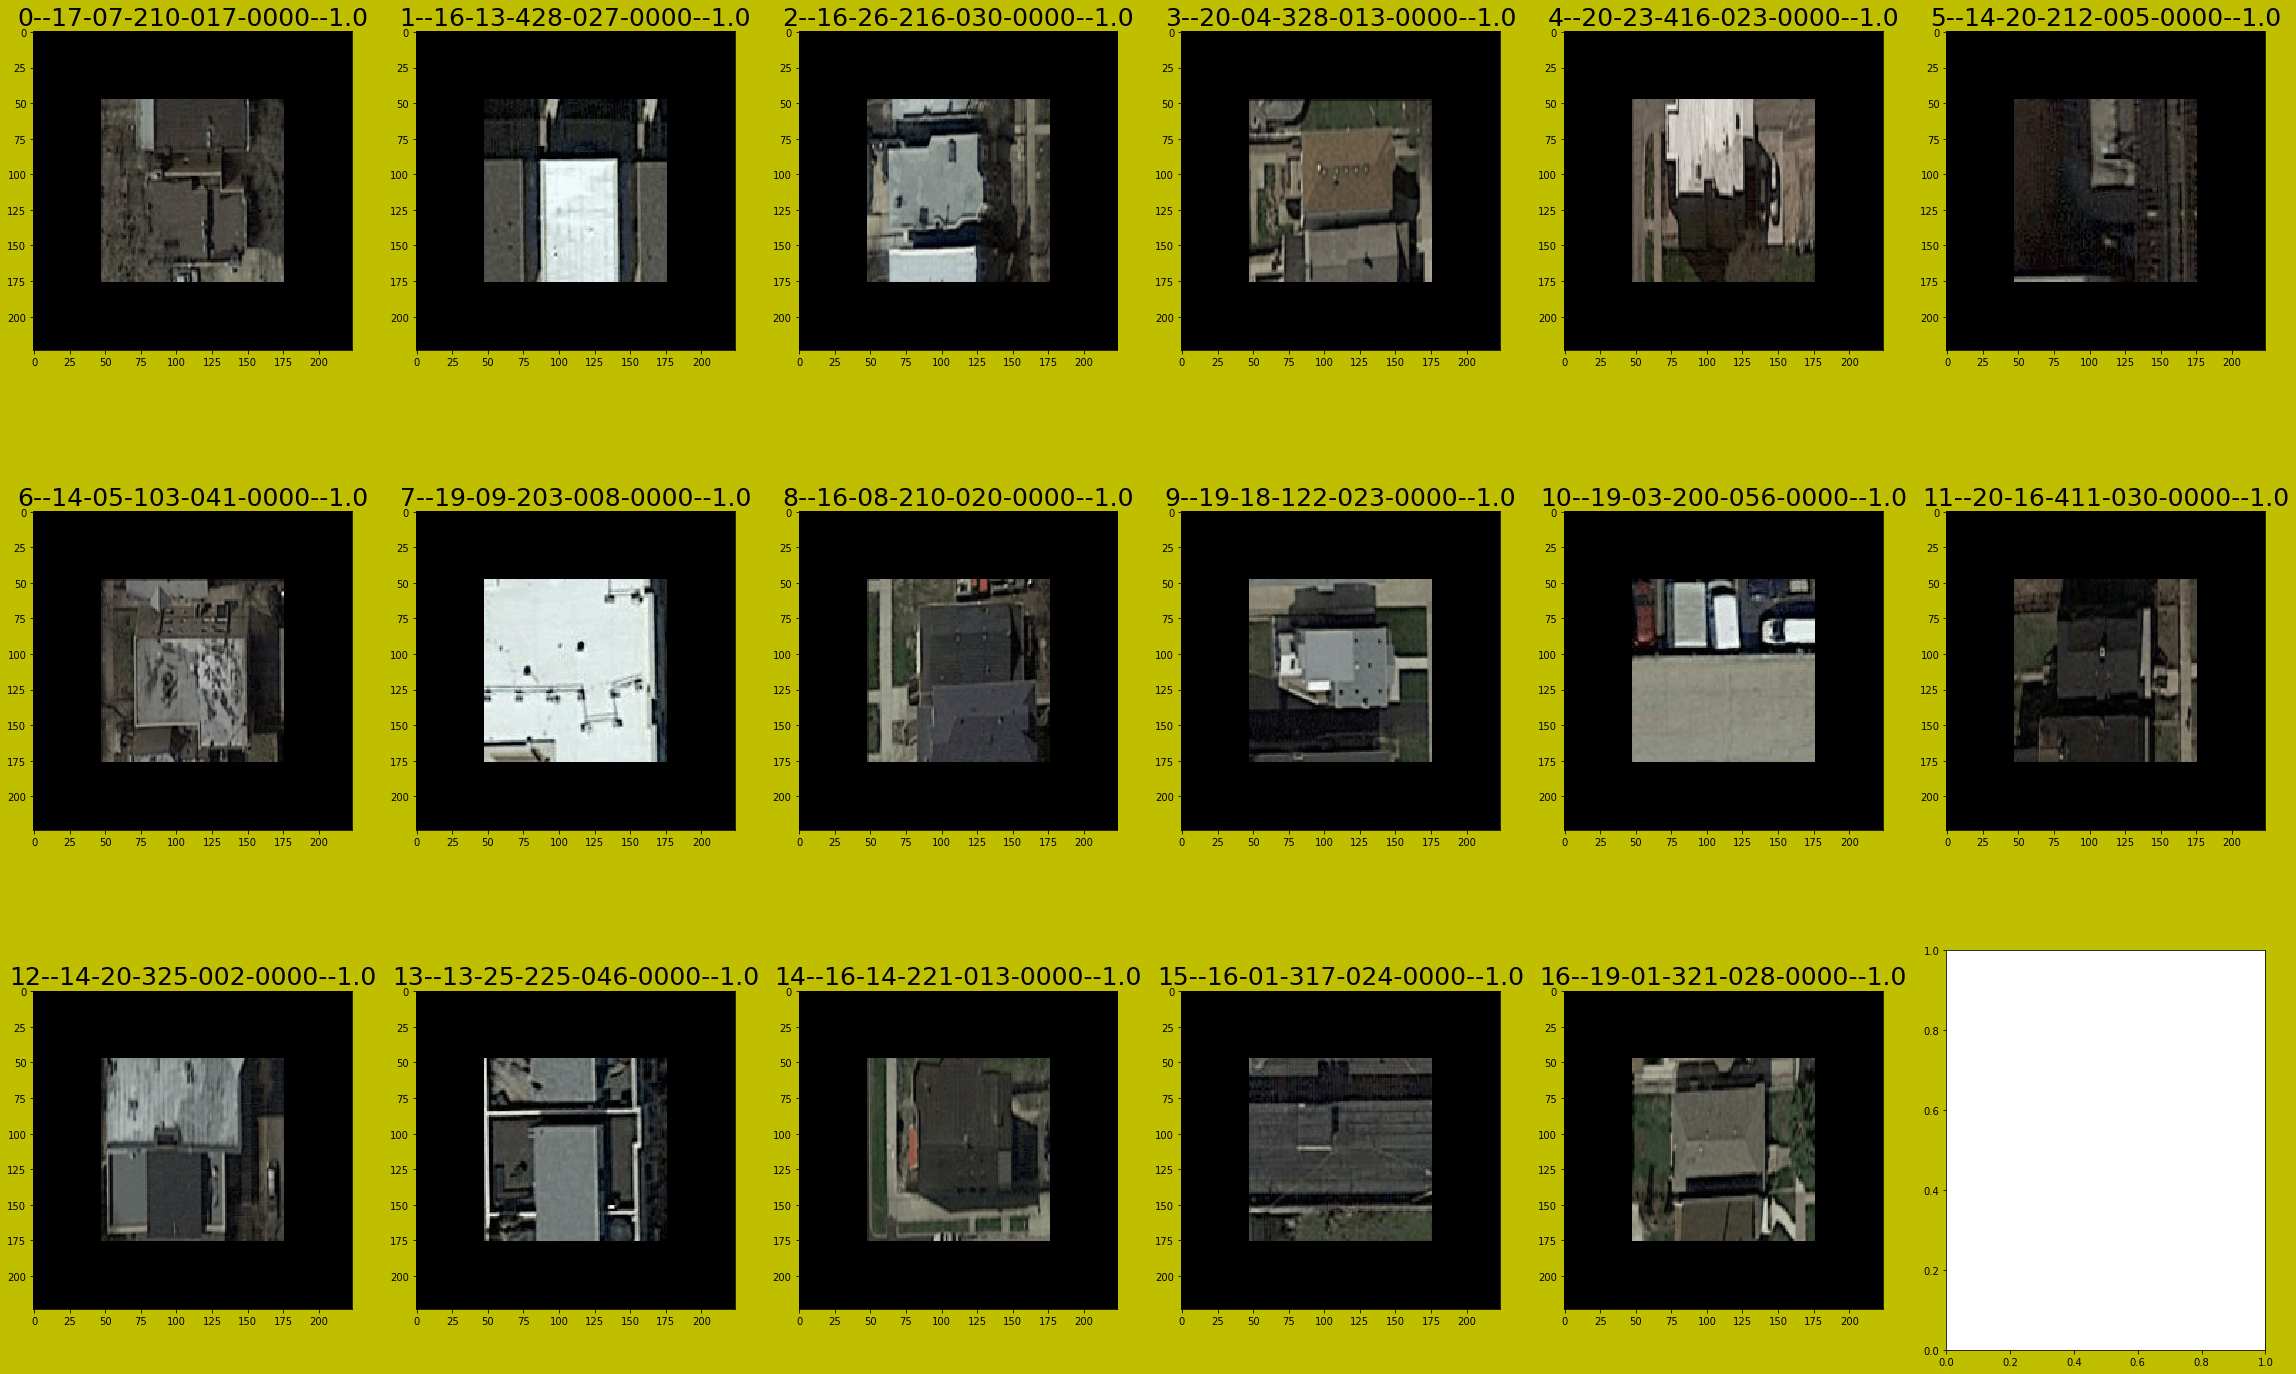

In [65]:
vizualize(obj_gI, cv_land_mis_pins_path, cv_land_mis_pins_title, data_type='uint8', rows=3, columns=6, figsize=(40, 25))

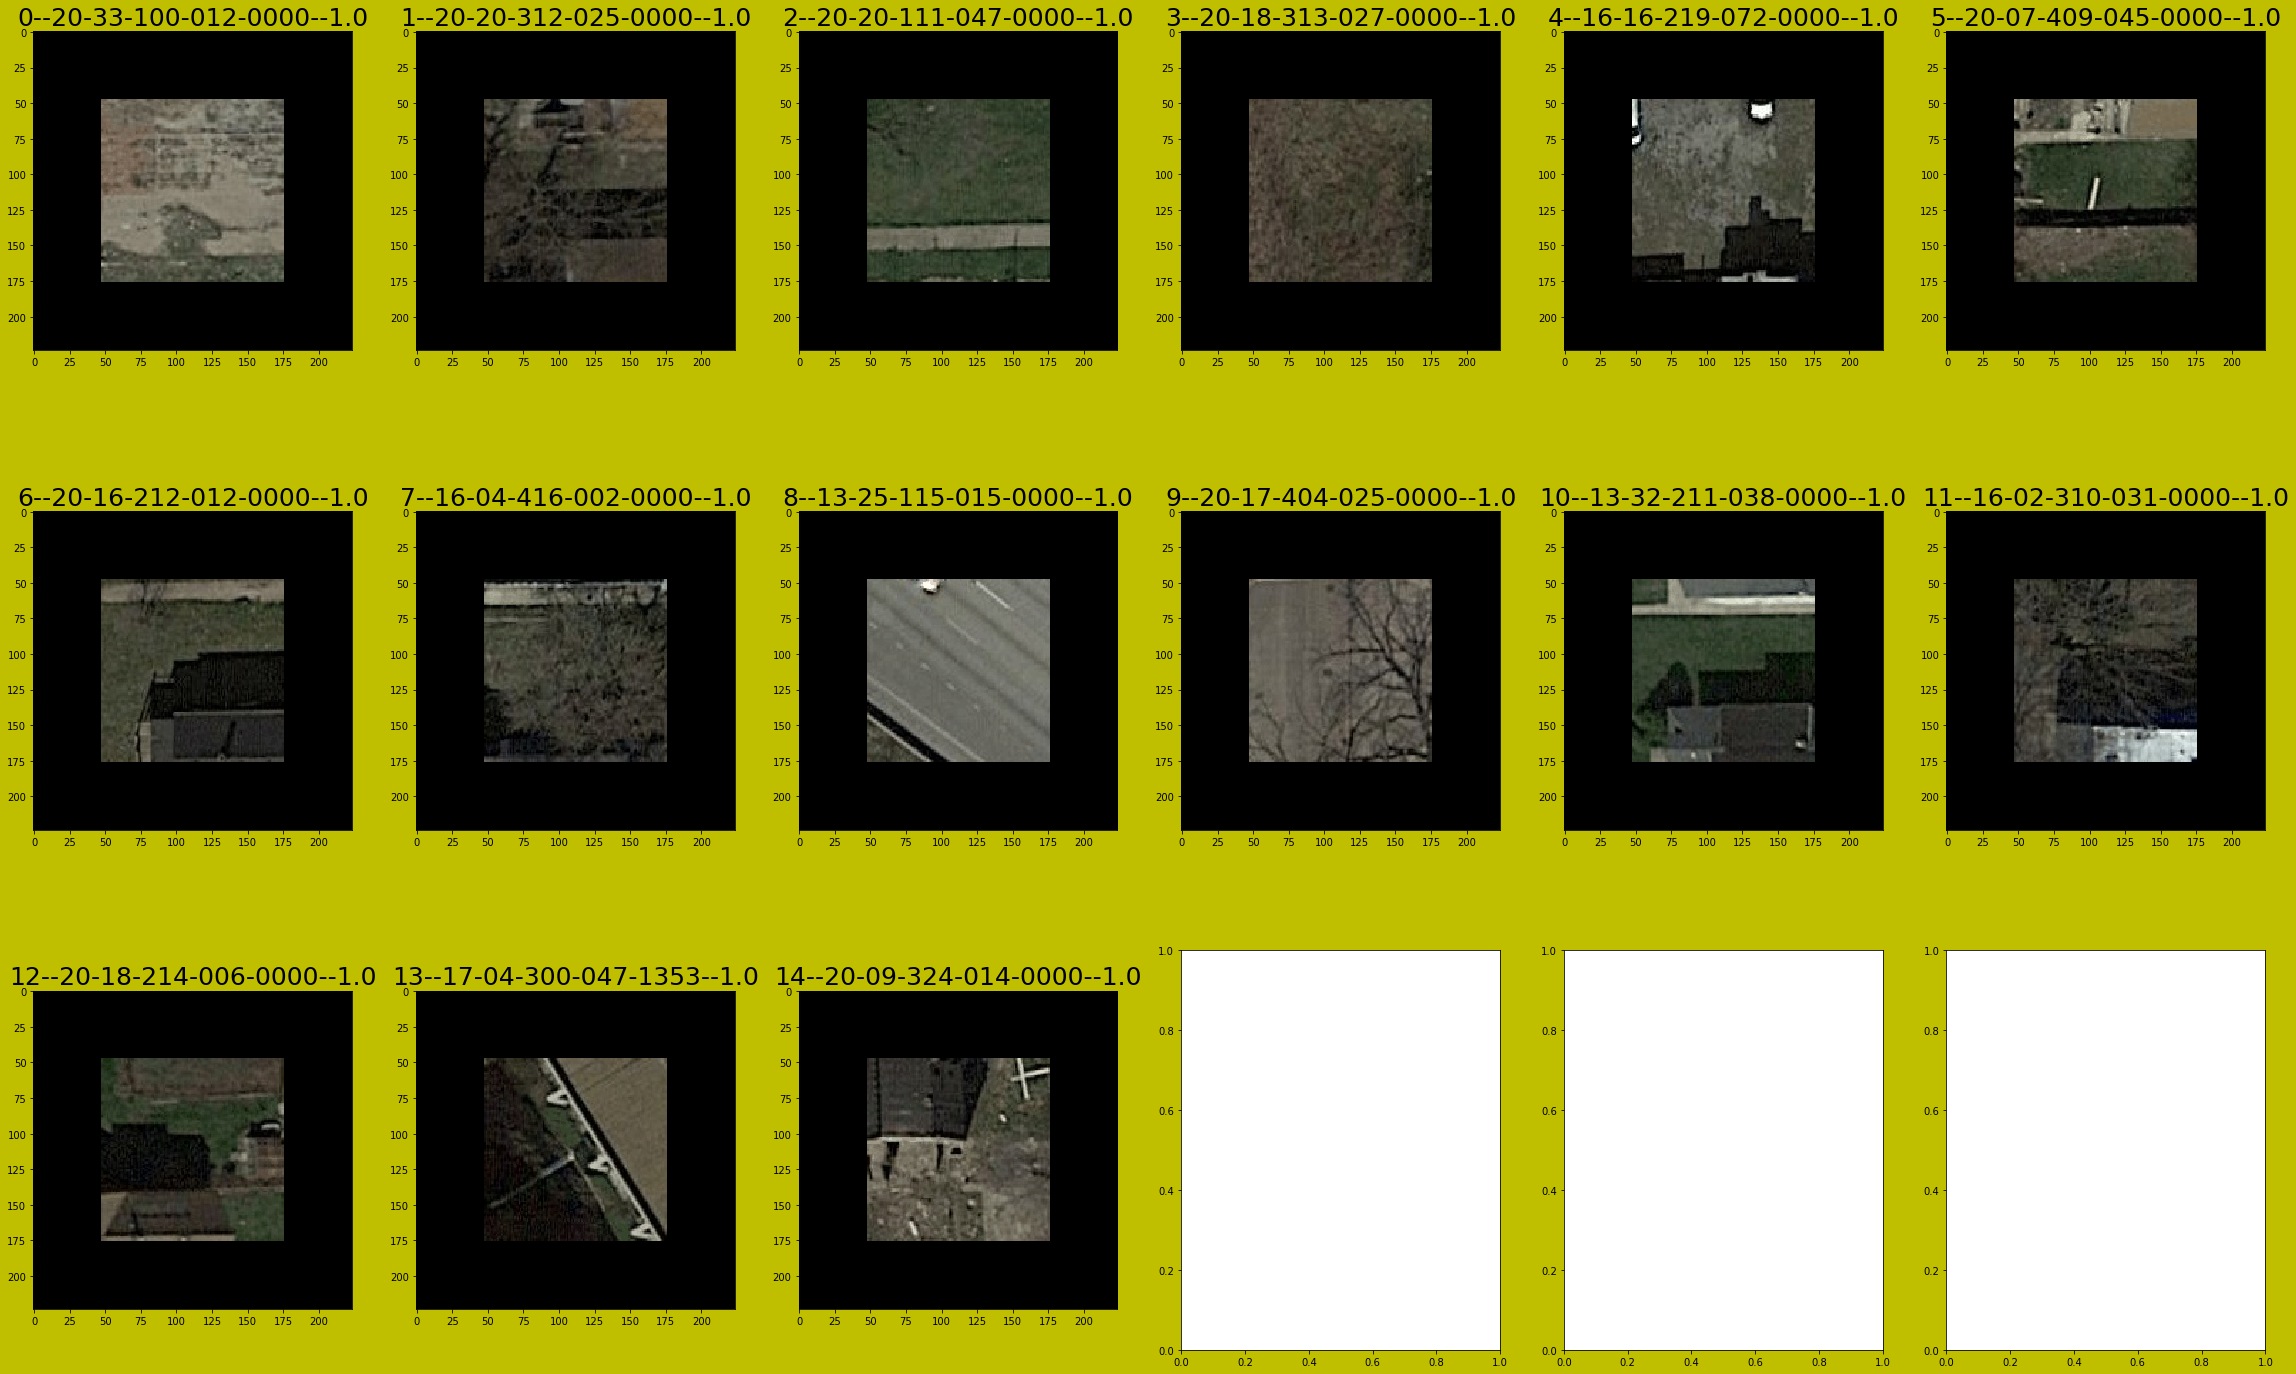

In [66]:
vizualize(obj_gI, cv_house_mis_pins_path, cv_house_mis_pins_title, data_type='uint8', rows=3, columns=6, figsize=(40, 25))

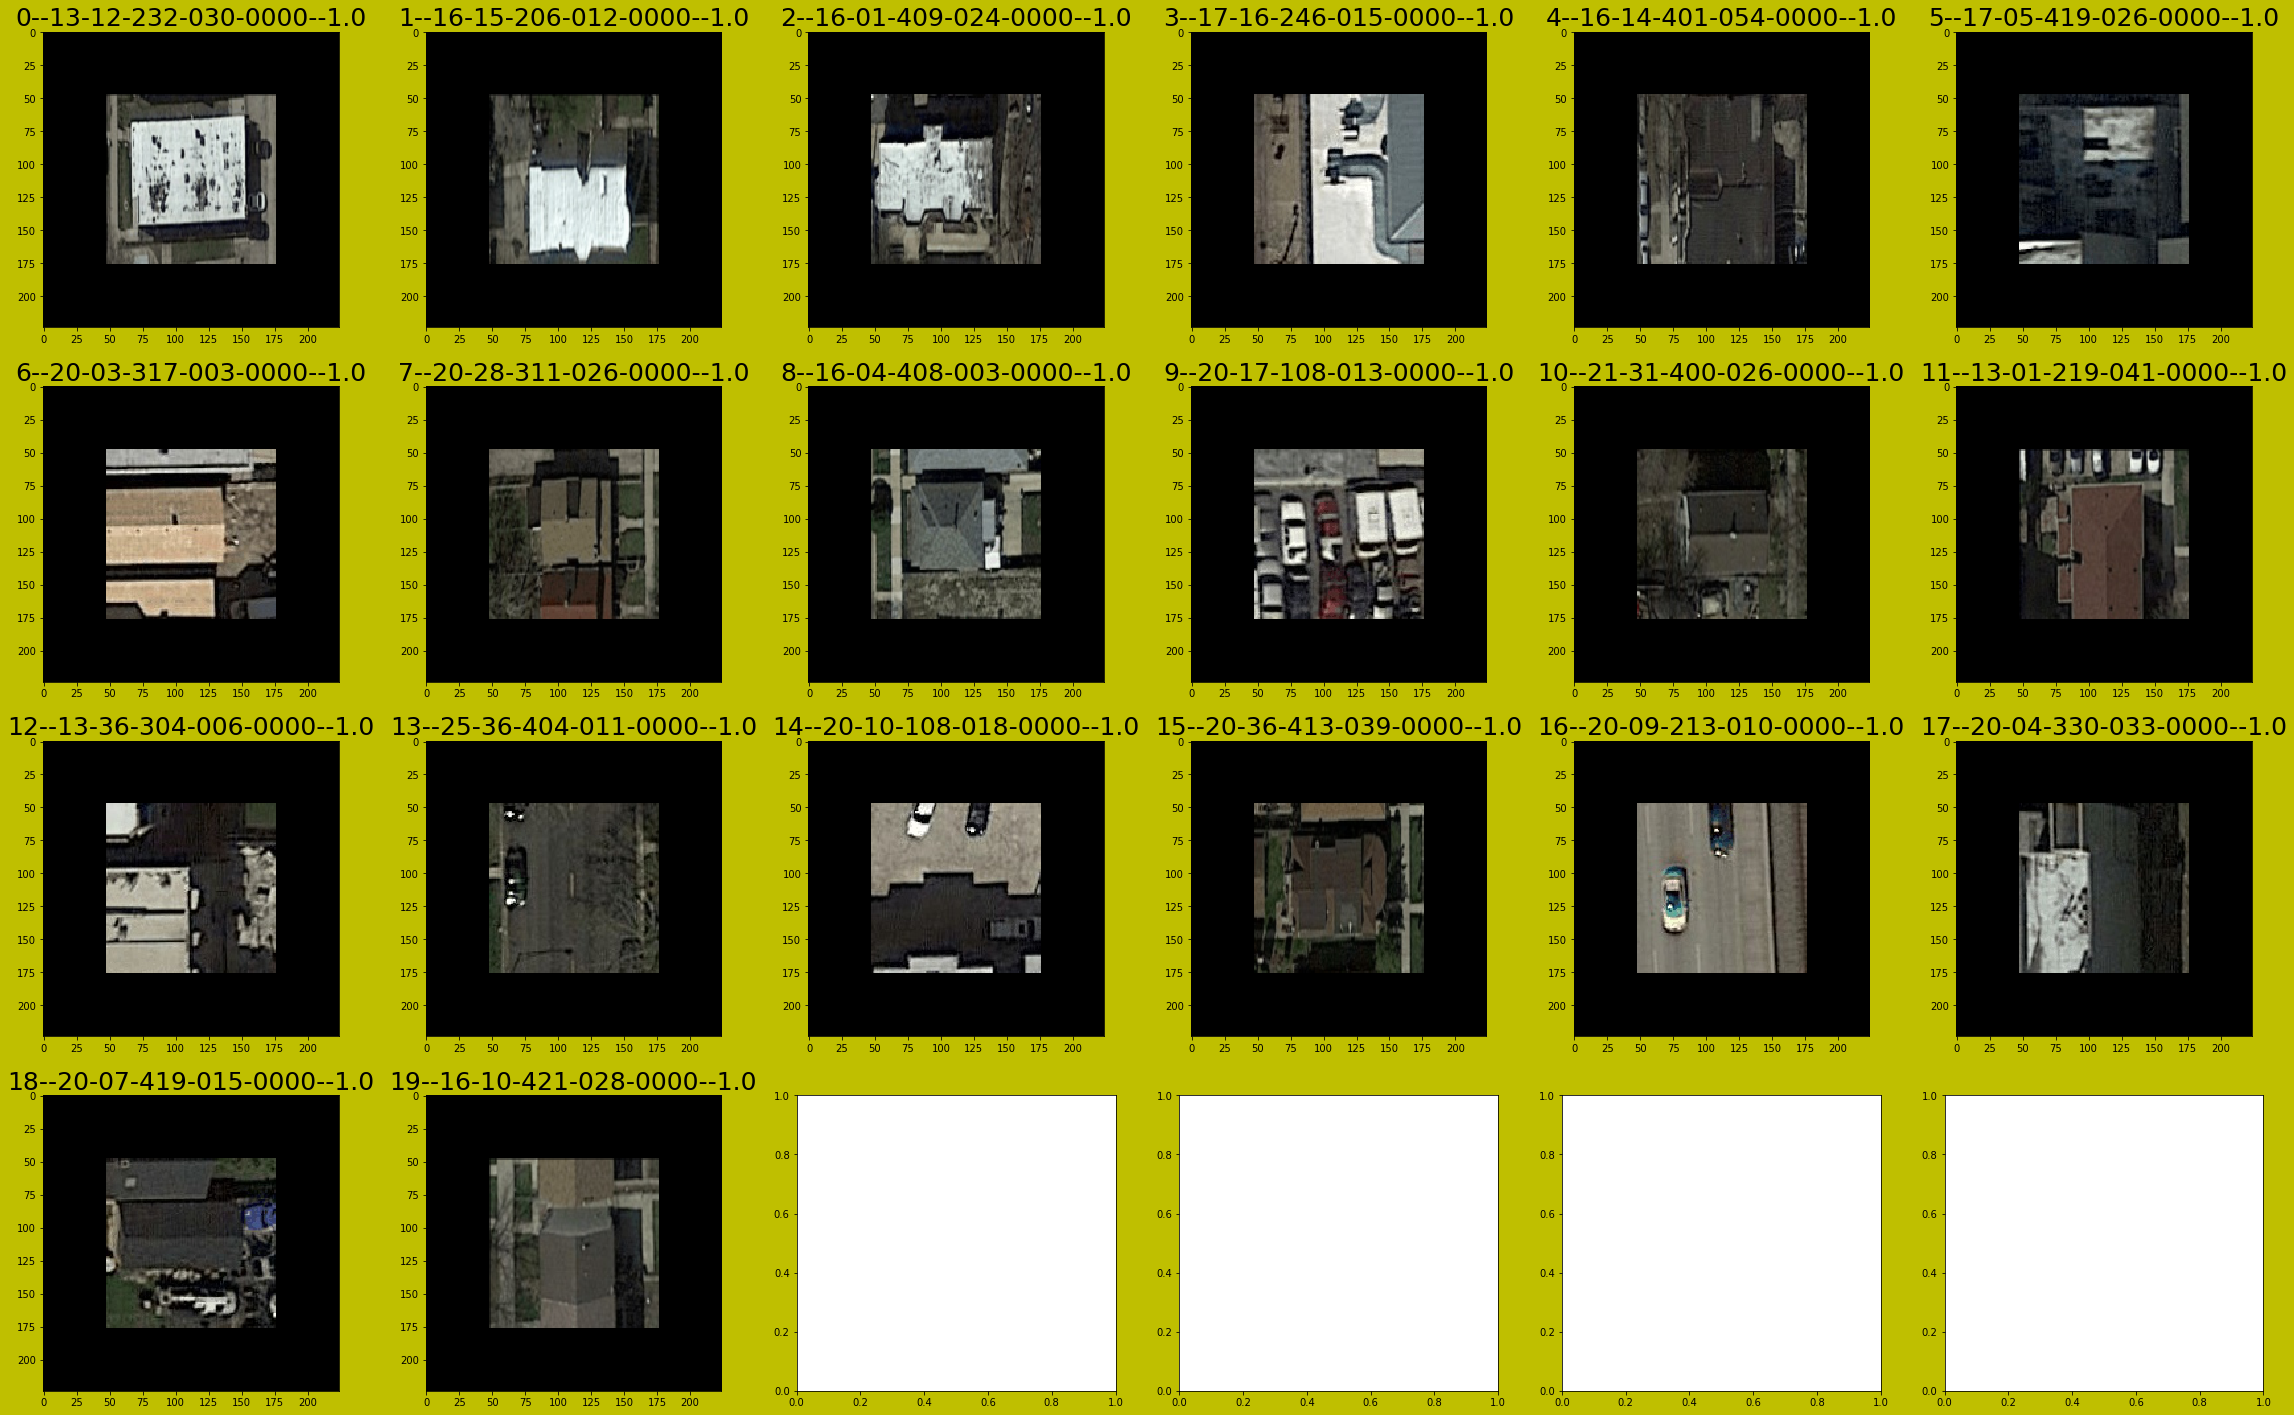

In [68]:
vizualize(obj_gI, ts_land_mis_pins_path, ts_land_mis_pins_title, data_type='uint8', rows=4, columns=6, figsize=(40, 25))

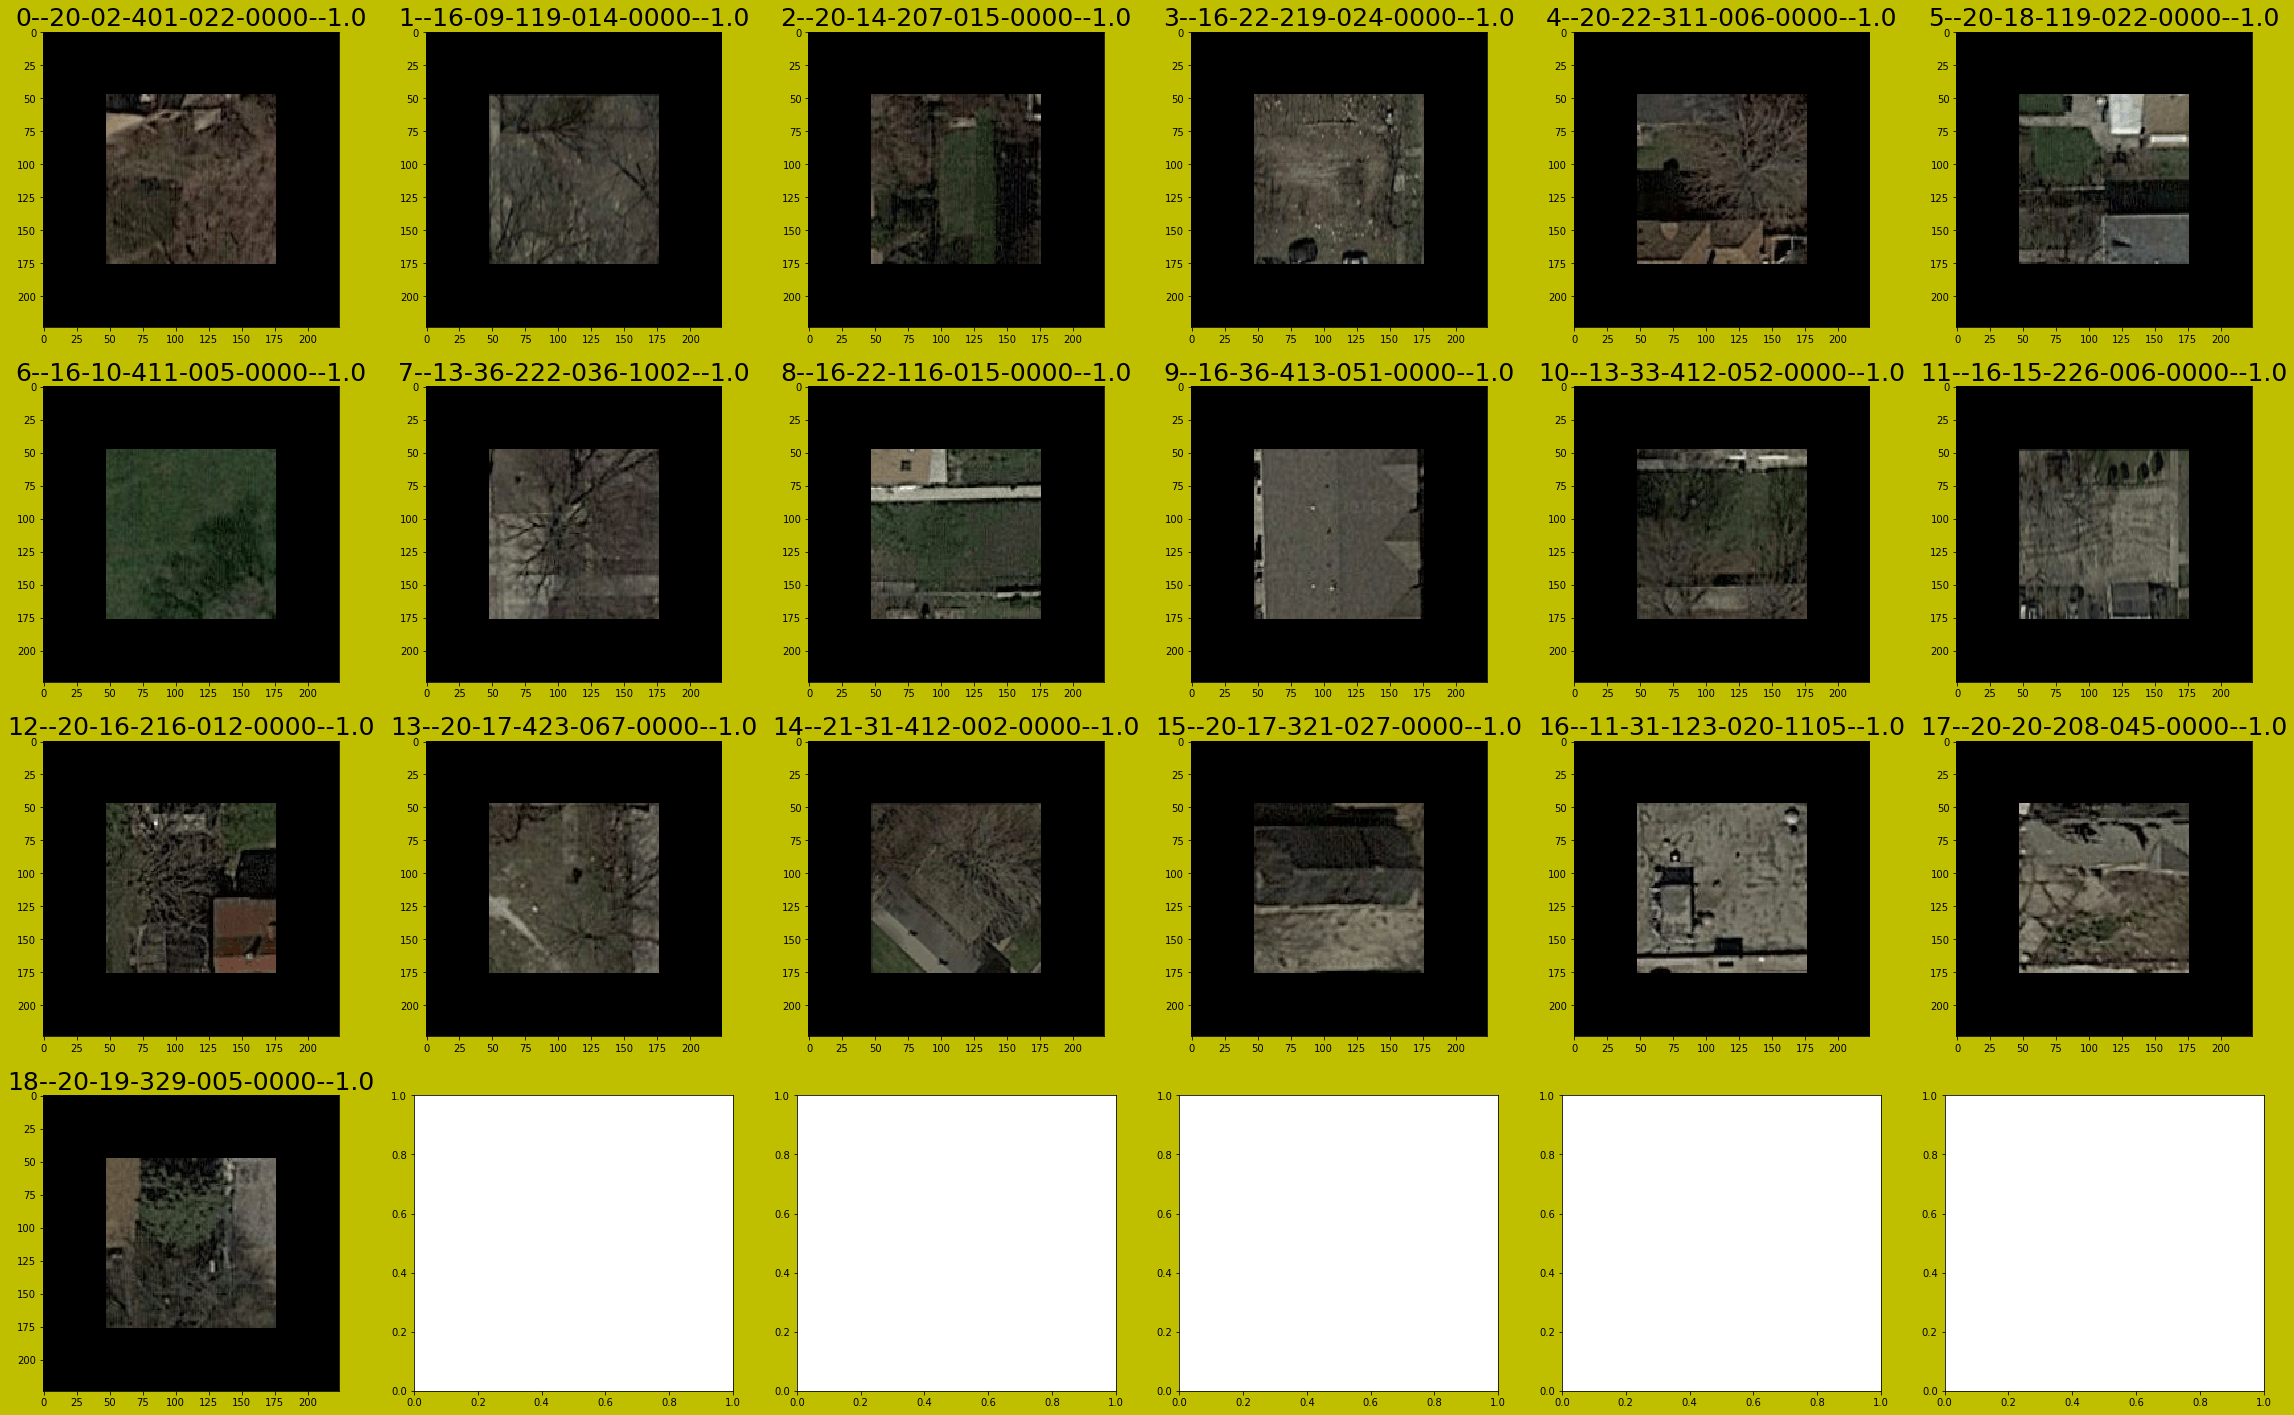

In [69]:
vizualize(obj_gI, ts_house_mis_pins_path, ts_house_mis_pins_title, data_type='uint8', rows=4, columns=6, figsize=(40, 25))